In [1]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [3]:
# load model
model = tf.keras.models.load_model('./models/object_detection.h5')

In [4]:
path = './test_images/Cars48.png'
image = load_img(path)
image = np.array(image,dtype=np.uint8) 
image1 = load_img(path,target_size=(224,224))
image_arr_244 = img_to_array(image1)/255.0 # convert to array and get the normalised output

In [5]:
# print size of original image
h,w,d = image.shape
h,w,d

(225, 400, 3)

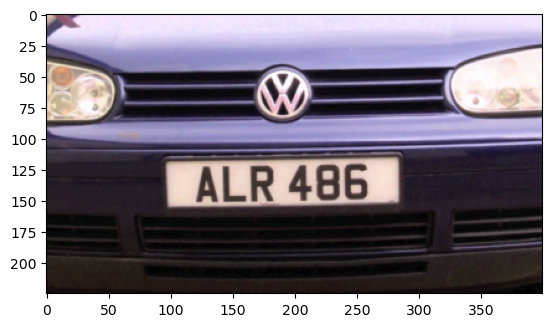

In [6]:
plt.imshow(image)
plt.show()

In [7]:
test_arr = image_arr_244.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [8]:
# make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 3s 3s/step


array([[0.27647755, 0.67208326, 0.53166896, 0.7106319 ]], dtype=float32)

In [9]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords*denorm
coords

array([[110.5910182 , 268.83330345, 119.62551624, 159.89217907]])

In [10]:
coords = coords.astype(np.int32)
coords

array([[110, 268, 119, 159]])

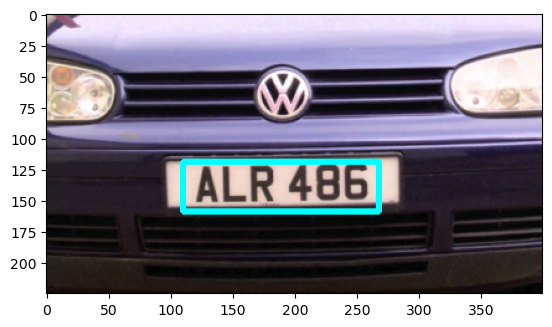

In [11]:
# Draw the bounding on the top of the image
xmin,xmax,ymin,ymax = coords[0]
plt1 = (xmin,ymin)
plt2 = (xmax,ymax)
cv2.rectangle(image,plt1,plt2,(0,255,255),3)
plt.imshow(image)
plt.show()

In [12]:
# Create a Pipeline model
def object_detection(path):
    
    image = load_img(path)
    image = np.array(image, dtype=np.uint8)
    image1 = load_img(path, target_size=(224, 224))
    
    # Data Preprocessing
    image_arr_244 = img_to_array(image1)/255.0
    h,w,d = image.shape
    test_arr = image_arr_244.reshape(1,224,224,3)
    
    # make predictions
    coords = model.predict(test_arr)
    
    # denormalize the predictions   
    denorm = np.array([w, w, h, h])
    coords = coords*denorm
    coords = coords.astype(np.int32)
    
    # Draw the bounding on the top of the image
    xmin, xmax, ymin, ymax = coords[0]
    plt1 = (xmin, ymin)
    plt2 = (xmax, ymax)
    cv2.rectangle(image, plt1, plt2, (0, 255, 255), 3)
    return image,coords

1/1 [==============================] - 0s 164ms/step


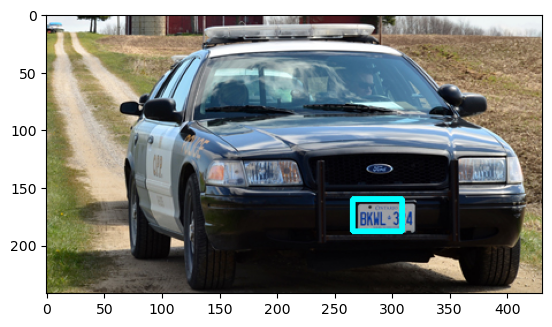

In [26]:
path = './test_images/Cars57.png'
image,cods = object_detection(path)
plt.imshow(image)
plt.show()


# Optical Character Recognition

In [14]:
import pytesseract as pt

1/1 [==============================] - 0s 155ms/step


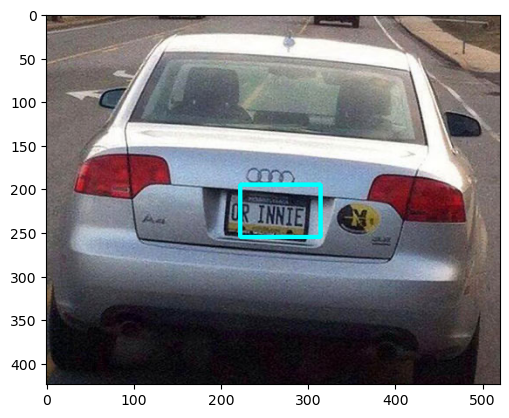

In [27]:
path = './test_images/Cars65.png'
image, cods = object_detection(path)
plt.imshow(image)
plt.show()


In [16]:
img = np.array(load_img(path))
xmin,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

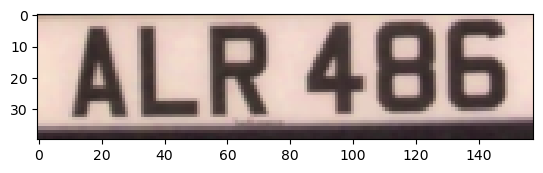

In [17]:
plt.imshow(roi)
plt.show()

In [18]:
# extract text from image

text = pt.image_to_string(roi)
print(text)

’ALR 486


